In [1]:
import numpy as np

In [2]:
import matplotlib.pyplot as plt

In [3]:
import pydicom as dicom

In [4]:
import PIL
from PIL import Image

In [5]:
import os

In [6]:
import cv2

In [7]:
from functions import *

In [8]:
path = 'D:\\Daria\\uni\\MS\\'

In [142]:
no = '01_3'

In [143]:
f = '\\png\\IM000012.png'

In [144]:
img = cv2.imread(path + no + f,3) #read img
#res0, msk0 = strip_one1(img)
#view(res0)
#gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) #convert to grayscale

In [9]:
def strip_one1(img):
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    hist,bins = np.histogram(img.flatten(),256,[0,256])
    cdf = hist.cumsum()
    cdf_normalized = cdf * hist.max()/ cdf.max()
    cdf_m = np.ma.masked_equal(cdf,0)
    cdf_m = (cdf_m - cdf_m.min())*255/(cdf_m.max()-cdf_m.min())
    cdf = np.ma.filled(cdf_m,0).astype('uint8')
    img2 = cdf[gray]
    mask_0 = img2 < 240
    ret, thresh = cv2.threshold(gray,0,255,cv2.THRESH_OTSU)
    thresh[~mask_0 == True] = 0
    print(thresh.mean())
    if thresh.mean() < 50:
        gray[~mask_0 == True] = 0
       # view(gray)
        ret, thresh = cv2.threshold(gray,0,255,cv2.THRESH_OTSU)
#view(thresh)
#ret, markers = cv2.connectedComponents(thresh)
#marker_area = [np.sum(markers == m) for m in range(np.max(markers)) if m != 0] 
#largest_component = np.argmax(marker_area) + 1              
#brain_mask = markers == largest_component
    brain_mask = remgar(thresh)
    brain_mask = np.uint8(brain_mask)
    clean = tophat(brain_mask, kernel(10))
    ker = np.ones((3,3), np.uint8) 
    erosion = cv2.erode(clean, ker, iterations=1) 
    closing_2 = close(erosion, 3)
    closing_2 = np.uint8(closing_2)
    mask_2 = floodfill(closing_2)
    exp = remgar(mask_2)
    exp = close(exp, 10)
    exp = floodfill(exp)
    segm = applymask(img, exp)
    return segm, exp

79.56298828125


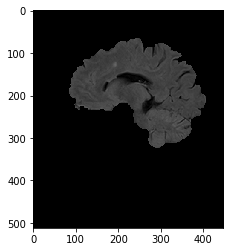

In [145]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
hist,bins = np.histogram(img.flatten(),256,[0,256])
cdf = hist.cumsum()
cdf_normalized = cdf * hist.max()/ cdf.max()
cdf_m = np.ma.masked_equal(cdf,0)
cdf_m = (cdf_m - cdf_m.min())*255/(cdf_m.max()-cdf_m.min())
cdf = np.ma.filled(cdf_m,0).astype('uint8')
img2 = cdf[gray]
mask_0 = img2 < 240
ret, thresh = cv2.threshold(gray,0,255,cv2.THRESH_OTSU)
thresh[~mask_0 == True] = 0
print(thresh.mean())
if thresh.mean() < 50:
    gray[~mask_0 == True] = 0
    view(gray)
    ret, thresh = cv2.threshold(gray,0,255,cv2.THRESH_OTSU)
#view(thresh)
#ret, markers = cv2.connectedComponents(thresh)
#marker_area = [np.sum(markers == m) for m in range(np.max(markers)) if m != 0] 
#largest_component = np.argmax(marker_area) + 1              
#brain_mask = markers == largest_component
brain_mask = remgar(thresh)
brain_mask = np.uint8(brain_mask)
clean = tophat(brain_mask, kernel(10))
ker = np.ones((3,3), np.uint8) 
erosion = cv2.erode(clean, ker, iterations=1) 
closing_2 = close(erosion, 3)
closing_2 = np.uint8(closing_2)
mask_2 = floodfill(closing_2)
exp = remgar(mask_2)
exp = close(exp, 10)
exp = floodfill(exp)
segm = applymask(img, exp)
view(segm)

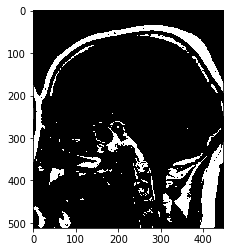

In [21]:
ret, thresh = cv2.threshold(gray,0,1,cv2.THRESH_OTSU)
view(thresh)

In [22]:
thresh[~mask_0 == True] = 0

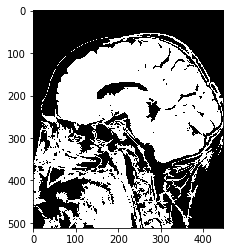

In [25]:
if thresh.mean() == 0:
    gray[~mask_0 == True] = 0
    ret, thresh = cv2.threshold(gray,0,255,cv2.THRESH_OTSU)
    ret, markers = cv2.connectedComponents(thresh)
    marker_area = [np.sum(markers == m) for m in range(np.max(markers)) if m != 0] 
    largest_component = np.argmax(marker_area) + 1              
    brain_mask = markers == largest_component
view(brain_mask)

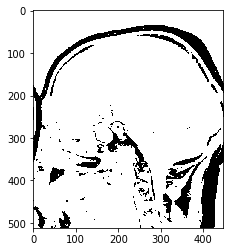

In [15]:
view(mask_0)

In [10]:
brains = []
folders = os.listdir('D:\\Daria\\uni\\MS')
for folder in folders:
    files = os.listdir(os.path.join(path, folder,'png'))
    for file in files:
        if file[-6:-4] == '09':
            im = cv2.imread(os.path.join(path,folder, 'png',file))
            res, _ = strip_one1(im)
            brains.append(res)
    print(folder)

74.14561680385044
01_1
99.09576416015625
01_10
86.21102469308036
01_100
81.368408203125
01_101
108.73541695731026
01_102
96.75783429827008
01_104
19.413822719029017
01_106
97.71210217085041
01_107
6.302294049944196
01_108
68.45254080636161
01_11
79.13942609514508
01_110
76.48354666573661
01_112
88.07314191545758
01_114
82.34226771763393
01_117
88.21544102260044
01_120
86.57677786690849
01_124
80.40121895926339
01_127
93.21480887276786
01_129
87.50616891043526
01_132
92.79458182198661
01_134
81.20720999581474
01_138
90.22096906389508
01_140
112.10168021065849
01_142
76.28899710518974
01_143
83.09267316545758
01_144
92.15090070452008
01_150
96.44210815429688
01_157
93.76288277762276
01_158
80.41233607700893
01_163
13.610687255859375
01_165
79.03937203543526
01_168
81.85756138392857
01_170
93.00469534737724
01_173
89.01365007672992
01_176
91.48276192801339
01_179
82.26333618164062
01_184
81.03822980608258
01_186
81.28725324358258
01_19
87.20155988420758
01_191
93.26372419084821
01_196
67.

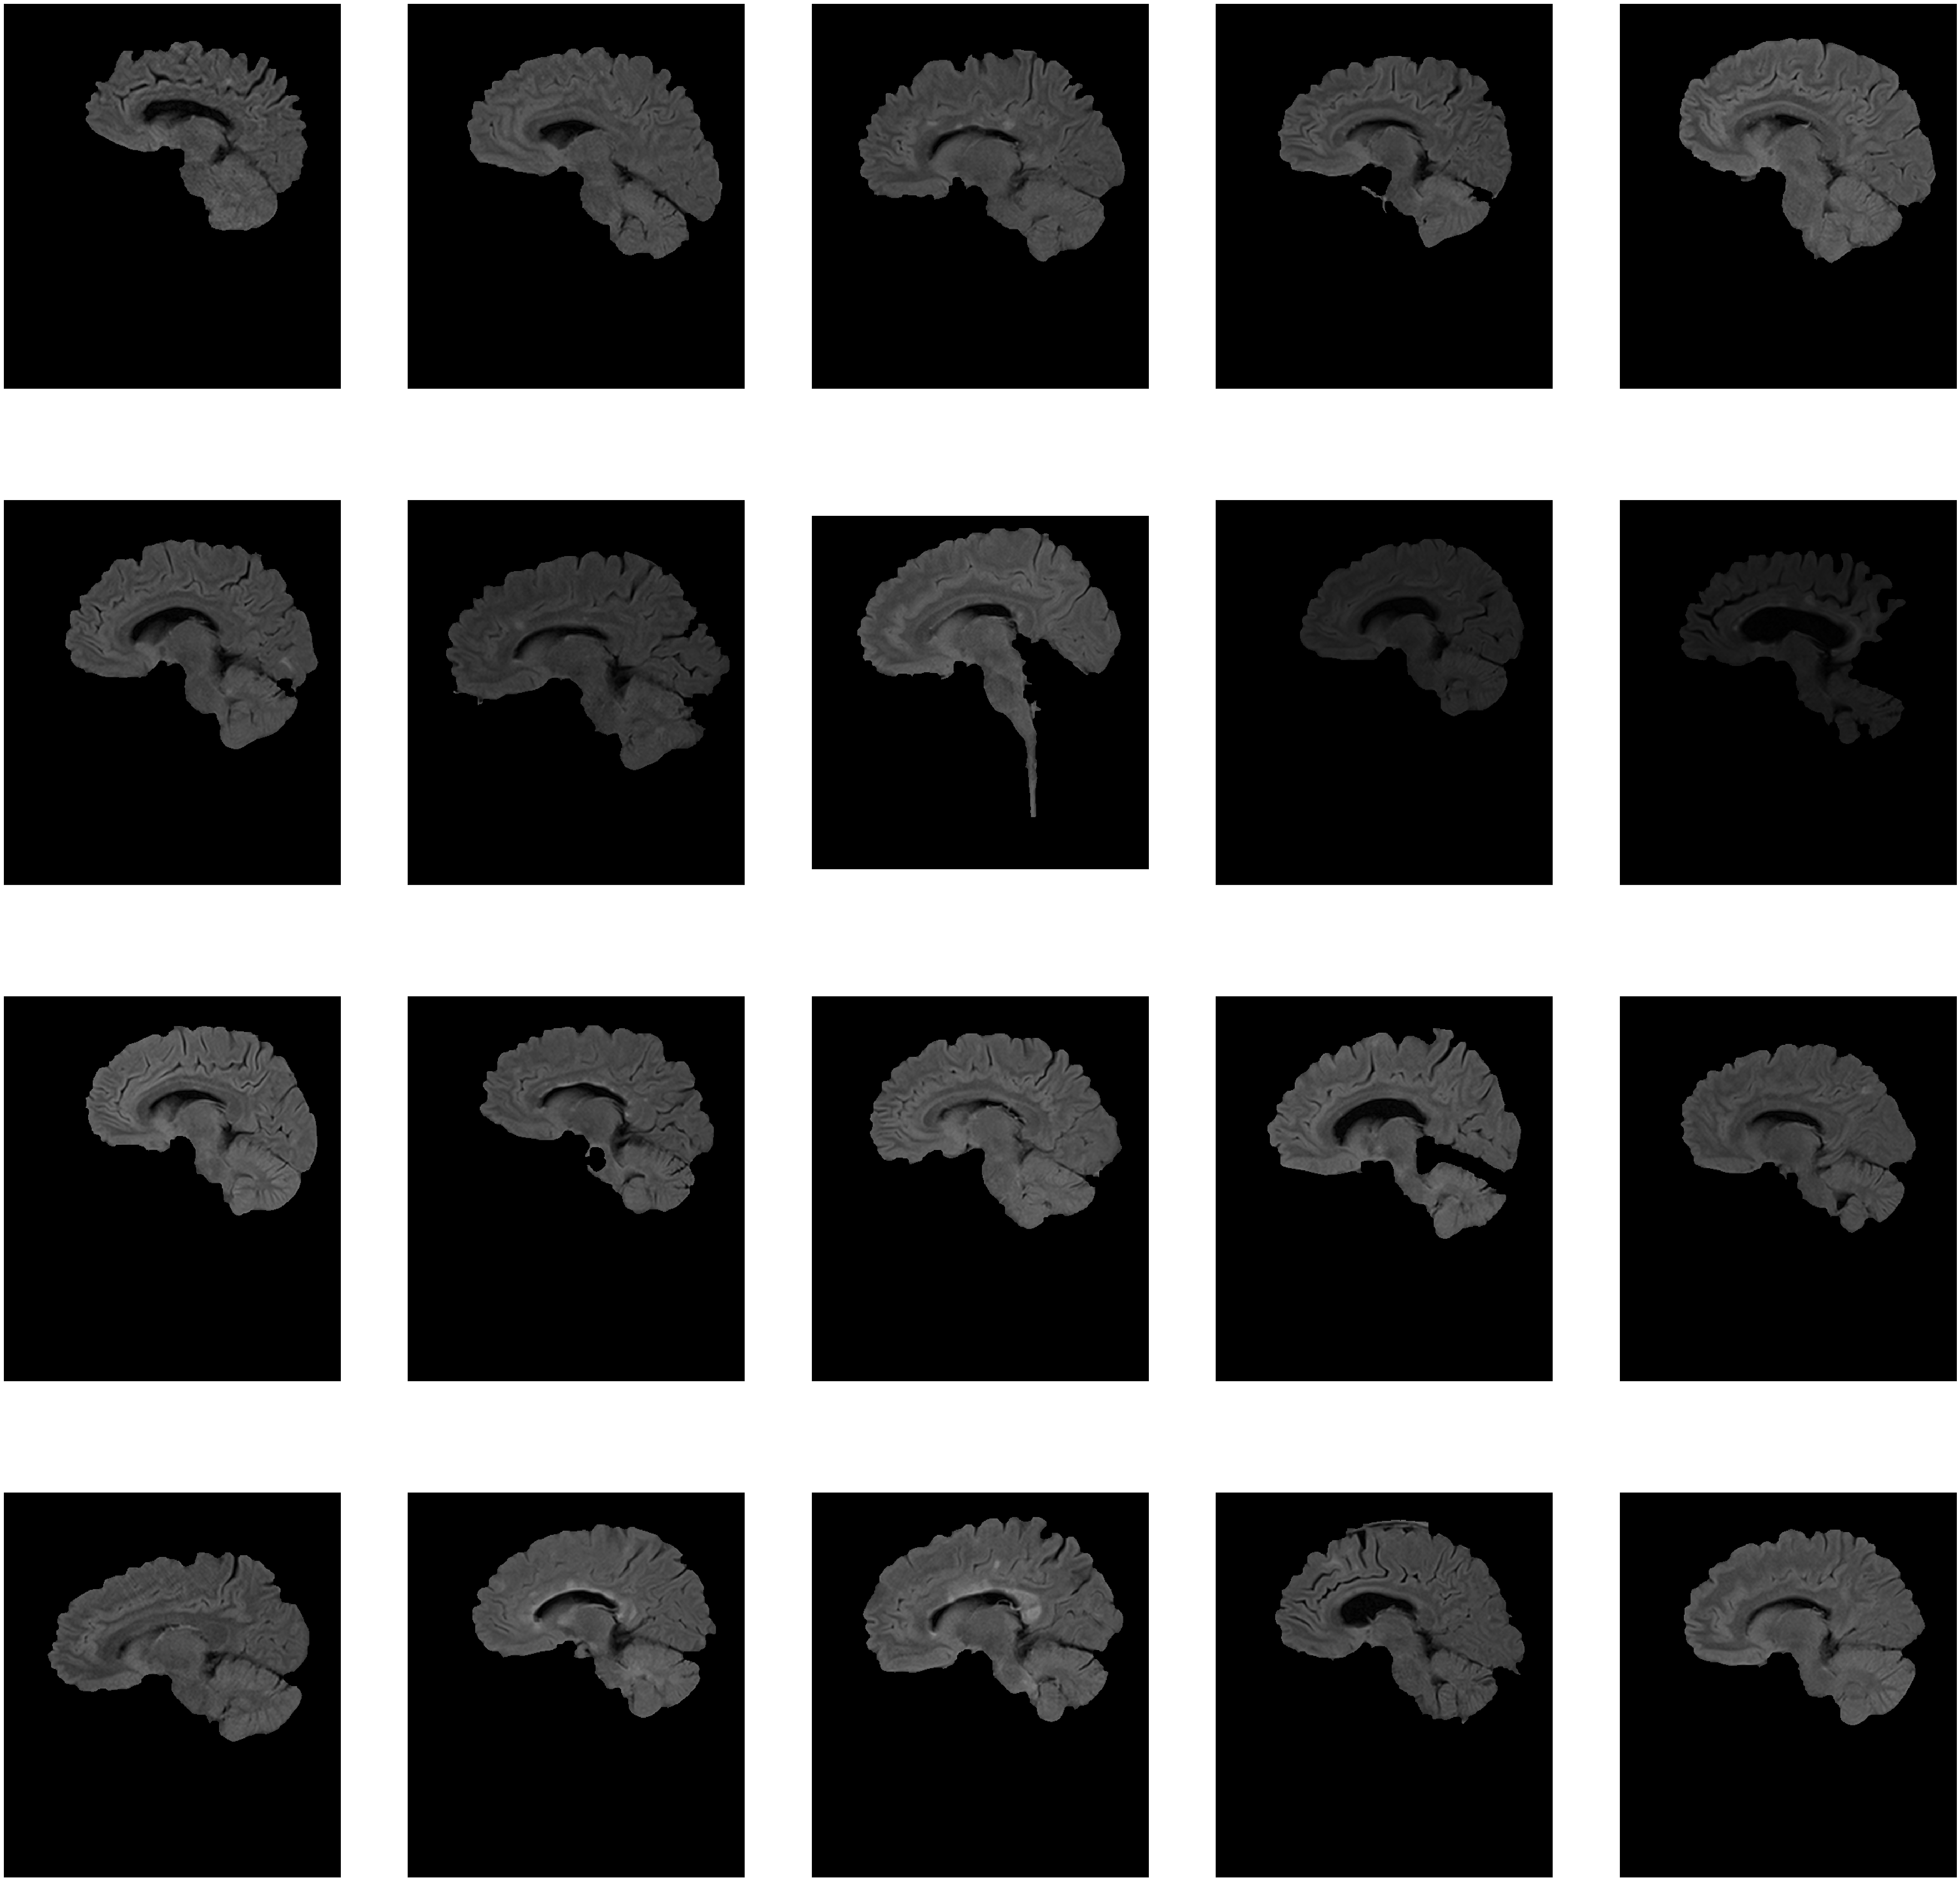

In [118]:
show(brains[:20])

In [115]:
def show(segm):
    plt.figure(figsize = (100,100))
    for i, brain in enumerate(segm):
        sub = len(segm)
        plt.subplot(sub//5, 5, i+1),view(brain)
        plt.xticks([]), plt.yticks([])
    plt.show

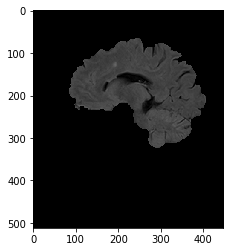

In [151]:
view(segm)

In [158]:
path1 = 'D:\\Daria\\uni\\test issl\\sravnenie mnogoonko\\do\\dicom sm do\\Sm Head Brain\\t1_fl3d_sag - 3 - png\\IM-0002-0075-0001.dcm.png'

In [159]:
img = cv2.imread(path1,3)

110.24734497070312


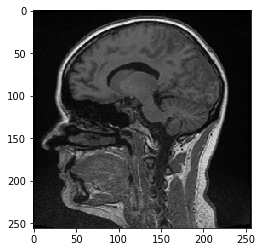

In [160]:
res1, msk1 = strip_one1(img)
view(img)

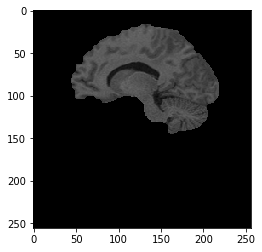

In [161]:
view(res1)

In [175]:
path2 = 'D:\\Daria\\uni\\test issl\\rs\\dicom+roi\\rs1 24_09_18\\Head + C-Sp + C\\AX T2 FLAIR - 5 - png\\IM-0004-0017-0001.dcm.png'

In [176]:
img = cv2.imread(path2,3)

50.84941864013672


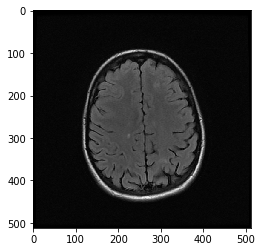

In [177]:
res2, msk2 = strip_one1(img)
view(img)

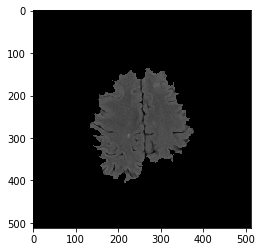

In [178]:
view(res2)

In [11]:
masks = []
folders = os.listdir('D:\\Daria\\uni\\MS')
for folder in folders:
    files = os.listdir(os.path.join(path, folder,'tif'))
    for file in files:
        if file[-6:-4] == '09':
            masks.append(np.array(PIL.Image.open(os.path.join(path,folder,'tif',file))))
    print(folder)

01_1
01_10
01_100
01_101
01_102
01_104
01_106
01_107
01_108
01_11
01_110
01_112
01_114
01_117
01_120
01_124
01_127
01_129
01_132
01_134
01_138
01_140
01_142
01_143
01_144
01_150
01_157
01_158
01_163
01_165
01_168
01_170
01_173
01_176
01_179
01_184
01_186
01_19
01_191
01_196
01_198
01_199
01_2
01_20
01_203
01_204
01_209
01_213
01_222
01_223
01_228
01_230
01_232
01_235
01_237
01_242
01_246
01_251
01_252
01_253
01_256
01_258
01_259
01_260
01_262
01_265
01_268
01_27
01_271
01_275
01_278
01_279
01_285
01_289
01_290
01_292
01_293
01_294
01_297
01_3
01_301
01_304
01_307
01_309
01_310
01_316
01_32
01_320
01_327
01_330
01_332
01_34
01_340
01_341
01_342
01_343
01_344
01_345
01_349
01_355
01_356
01_358
01_359
01_363
01_367
01_369
01_370
01_373
01_376
01_378
01_379
01_381
01_387
01_39
01_392
01_393
01_394
01_396
01_397
01_400
01_403
01_404
01_409
01_412
01_414
01_416
01_424
01_425
01_426
01_43
01_432
01_434
01_438
01_441
01_444
01_447
01_449
01_453
01_455
01_463
01_467
01_47
01_471
01_474
01_475
0

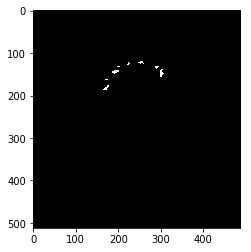

In [33]:
n = 7
view(masks[n])

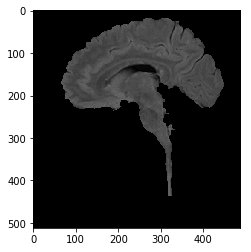

In [34]:
view(brains[n])

In [35]:
hist,bins = np.histogram(brains[n].flatten(),256,[0,256])
cdf = hist.cumsum()
cdf_normalized = cdf * hist.max()/ cdf.max()
cdf_m = np.ma.masked_equal(cdf,0)
cdf_m = (cdf_m - cdf_m.min())*255/(cdf_m.max()-cdf_m.min())
cdf = np.ma.filled(cdf_m,0).astype('uint8')
img2 = cdf[brains[n]]

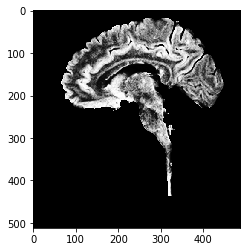

In [36]:
view(img2)